# Interact with  `D.lensalot`
This notebook serves as starting point on how to interact with `D.lensalot` interactively, i.e. Jobs are loaded and all `D.lensalot` object are accessible

# Header

In [1]:
import os
from os.path import join as opj
import numpy as np
import healpy as hp

import matplotlib.pyplot as plt

import lenscarf
from lenscarf.run import run

cond4mpi does not exists
could not setup healpix hack. reverting to standard healpy
MSC: using scarf with 2 OMP threads


# Choose analysis

In [2]:
fn = opj(os.path.dirname(os.path.abspath(lenscarf.__file__)),'ana/config/examples/mwe/conf_mwe_GF.py')
# fn = '/pscratch/sd/s/sebibel/dlensalot/n32/sims_postborn/sims_postborn_lminB200_postborn_GF/conf_mwe_GF.py'
ana_mwe = run(config=fn, job_id='QE_lensrec', verbose=True).job
ana_mwe.run()

INFO:: 02-01 14:53:: lenscarf.lerepi.core.handler.log - load_configfile() Started: /global/u2/s/sebibel/git/lenscarf/lenscarf/ana/config/examples/mwe/conf_mwe_GF.py
INFO:: 02-01 14:53:: lenscarf.lerepi.core.handler.log - load_configfile() Finished
INFO:: 02-01 14:53:: lenscarf.lerepi.core.handler.log - store() Started
INFO:: 02-01 14:53:: lenscarf.lerepi.core.handler.log - load_configfile() Started: /global/cscratch1/sd/sebibel/dlensalot/n32/sims_postborn/sims_postborn_lminB30_postborn_GF_Louissettings/conf_mwe_GF.py
INFO:: 02-01 14:53:: lenscarf.lerepi.core.handler.log - load_configfile() Finished
INFO:: 02-01 14:53:: root.store - config file look the same. Resuming where I left off last time.
INFO:: 02-01 14:53:: root.store - Matching config file found. Resuming where I left off.
INFO:: 02-01 14:53:: lenscarf.lerepi.core.handler.log - store() Finished
INFO:: 02-01 14:53:: lenscarf.lerepi.core.handler.log - collect_jobs() Started
INFO:: 02-01 14:53:: lenscarf.lerepi.core.handler.log -

In [2]:
fn = opj(os.path.dirname(os.path.abspath(lenscarf.__file__)),'ana/config/examples/mwe/conf_mwe_GF.py')
ana_mwe = run(config=fn, job_id='MAP_lensrec', verbose=False).job
ana_mwe.run()

## Now you have full access to all D.lensalot objects 

In [3]:
ll = np.arange(0,ana_mwe.qe_lm_max_qlm[0]+1,1)
scale_factor = (ll*(ll+1))**2/(2*np.pi)

INFO:: 02-01 22:59:: lenscarf.core.handler.log - get_plm_it(0, [0]) started
INFO:: 02-01 22:59:: lenscarf.core.handler.log - get_plm_it(0, [0]) finished
INFO:: 02-01 22:59:: lenscarf.core.handler.log - get_plm_it(0, [15]) started
INFO:: 02-01 23:00:: lenscarf.core.handler.log - get_plm_it(0, [15]) finished


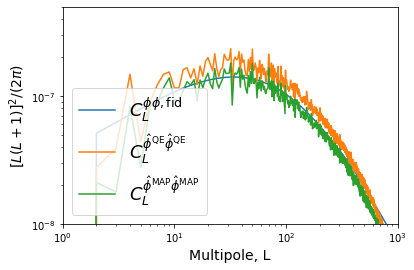

In [9]:
plm_QE = ana_mwe.get_plm_it(0, [0])[0]
plm_MAP = ana_mwe.get_plm_it(0, [15])[0]

plt.plot(scale_factor*ana_mwe.cpp, label=r'$C_L^{\phi\phi,{\rm fid}}$')
plt.plot(scale_factor*hp.alm2cl(plm_QE), label=r'$C_L^{\hat{\phi}^{\rm QE}\hat{\phi}^{\rm QE}}$')
plt.plot(scale_factor*hp.alm2cl(plm_MAP), label=r'$C_L^{\hat{\phi}^{\rm MAP}\hat{\phi}^{\rm MAP}}$')
# plt.plot(scale_factor*hp.alm2cl(plm_MAP[1]), label=r'$C_L^{\hat{\phi}^{\rm MAP}\hat{\phi}^{\rm MAP}}$')

plt.legend(fontsize=18)
plt.xlabel('Multipole, L', fontsize=14)
plt.ylabel(r'$\left[L(L+1)\right]^2/(2\pi)$', fontsize=14)
plt.xscale('log')
plt.xlim(1,1e3)
plt.ylim(1e-8,5e-7)
plt.yscale('log')

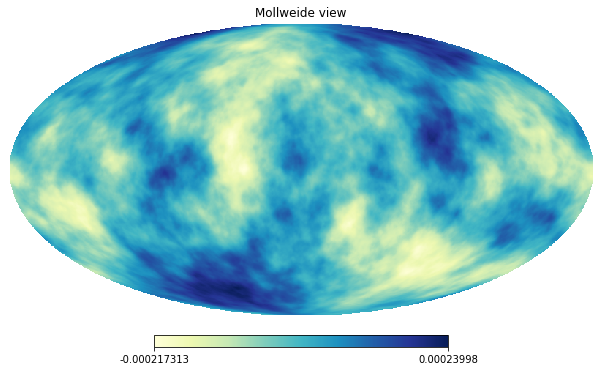

In [10]:
hp.mollview(hp.alm2map(plm_QE, nside=2048), cmap='YlGnBu')

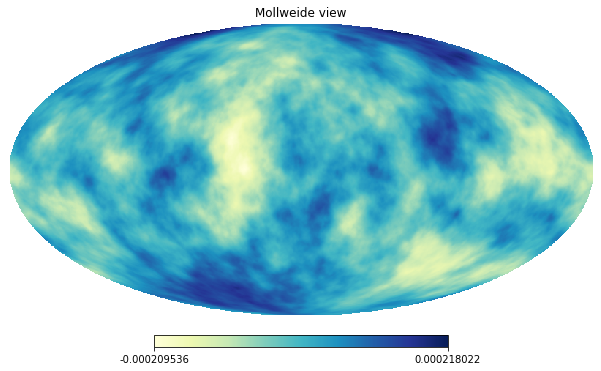

In [11]:
hp.mollview(hp.alm2map(plm_MAP, nside=2048), cmap='YlGnBu')

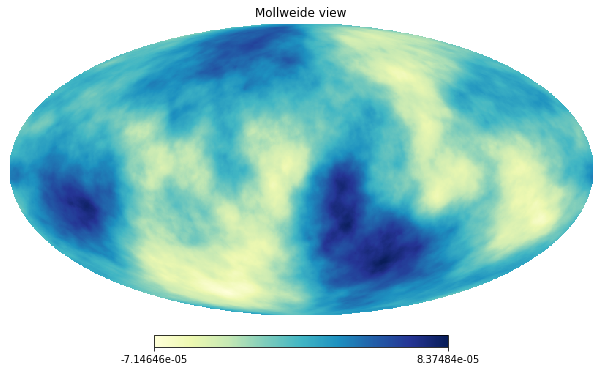

In [12]:
hp.mollview(hp.alm2map(plm_MAP-plm_QE, nside=2048), cmap='YlGnBu')

In [ ]:
blt_QE = ana_mwe.get_blt_it(0, [0])[0]
blt_MAP = ana_mwe.get_blt_it(0, [15])[0]
# plm_MAP = ana_mwe.get_plm_it(ana_mwe.itmax)

input_blensing = ana_mwe.sims.get_sim_blm(0)

almdel_QE = input_blensing - blt_QE
almdel_MAP = input_blensing - blt_MAP

plt.plot(hp.alm2cl(input_blensing), label=r'$C_L^{BB}$')
plt.plot(hp.alm2cl(almdel_QE), label=r'$C_L^{BB, {\rm QE,RL}}$')
plt.plot(hp.alm2cl(almdel_MAP), label=r'$C_L^{BB, {\rm MAP,RL}}$')


plt.legend(fontsize=18)
plt.xlabel('Multipole, $\ell$', fontsize=14)
plt.ylabel(r'$\left[L(L+1)\right]/(2\pi)$', fontsize=14)
plt.xscale('log')
plt.xlim(1,1e3)
plt.ylim(1e-8,5e-7)
plt.yscale('log')

/global/u2/s/sebibel/git/lenscarf/lenscarf/core/handler.py:686: RuntimeWarning: invalid value encountered in true_divide
  np.save(fn, mf/self.Nmf)


In [30]:
input_blensing = ana_mwe._sims.get_sim_blm(0)
iblens_map = hp.alm2map(ph.bandpass_alms(input_blensing,0,200), nside=1024)

blt_QE = ana_mwe.get_blt_it(0, 0, calc=False)
blt_QE_map = hp.alm2map(ph.bandpass_alms(blt_QE,0,200), nside=1024)

blt_MAP = ana_mwe.get_blt_it(0, 19, calc=False)
blt_MAP_map = hp.alm2map(ph.bandpass_alms(blt_MAP,0,200), nside=1024)

/global/u2/s/sebibel/git/lenscarf/lenscarf/core/handler.py:687: RuntimeWarning: invalid value encountered in true_divide
  np.save(fn, mf/self.Nmf)


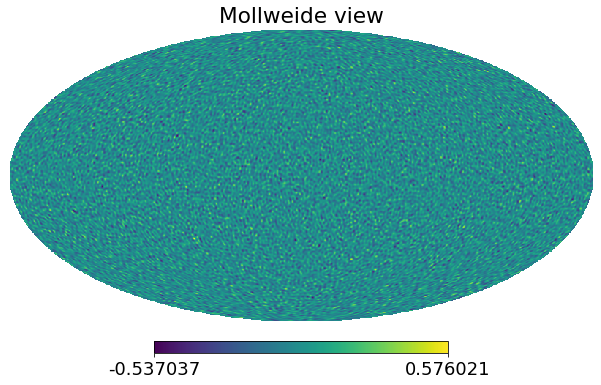

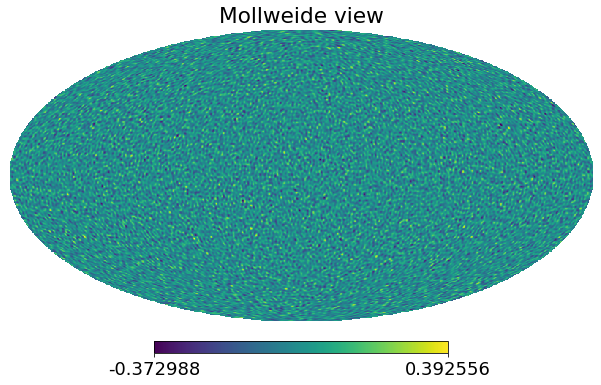

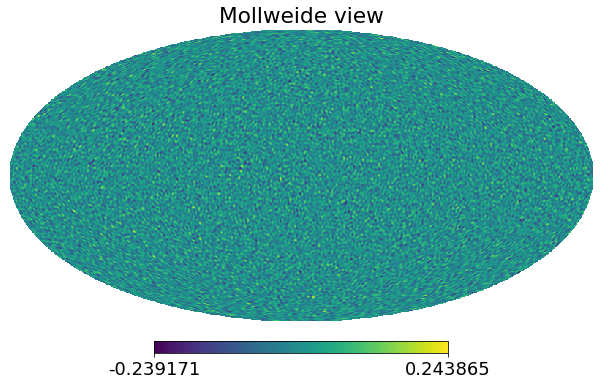

In [21]:
hp.mollview(blt_QE_map)
hp.mollview(iblens_map)
hp.mollview(iblens_map - blt_QE_map)

(1e-07, 1e-05)

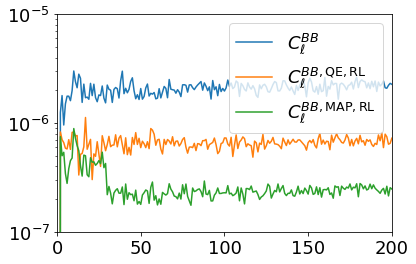

In [31]:
plt.plot(hp.anafast(iblens_map,lmax=200), label=r'$C_\ell^{BB}$')
plt.plot(hp.anafast(iblens_map - blt_QE_map,lmax=200), label=r'$C_\ell^{BB,{\rm QE,RL}}$')
plt.plot(hp.anafast(iblens_map - blt_MAP_map,lmax=200), label=r'$C_\ell^{BB,{\rm MAP,RL}}$')
plt.legend()
plt.yscale('log')
plt.xlim(0,200)
plt.ylim(1e-7,1e-5)